In [ ]:
#import thư viện
import numpy as np #thư viện xử lý ma trận
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import cifar100 # gọi tập dataset động vật, máy bay 
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ
from keras.backend import dropout

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

In [ ]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
# ép kiểu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#chuẩn hóa dữ liệu
x_train /=255
x_test /=255
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1000)              513000    
                                                                 
 dropout_9 (Dropout)         (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_19 (Dense)            (None, 512)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/100
313/313 [==============================] - 29s 91ms/step - loss: 4.4271 - accuracy: 0.0333 - val_loss: 4.1328 - val_accuracy: 0.0635
Epoch 2/100
313/313 [==============================] - 27s 88ms/step - loss: 4.1264 - accuracy: 0.0625 - val_loss: 4.0423 - val_accuracy: 0.0758
Epoch 3/100
313/313 [==============================] - 28s 88ms/step - loss: 3.9929 - accuracy: 0.0838 - val_loss: 3.8737 - val_accuracy: 0.1104
Epoch 4/100
313/313 [==============================] - 28s 89ms/step - loss: 3.8887 - accuracy: 0.0975 - val_loss: 3.7838 - val_accuracy: 0.1297
Epoch 5/100
313/313 [==============================] - 28s 90ms/step - loss: 3.8151 - accuracy: 0.1116 - val_loss: 3.7990 - val_accuracy: 0.1212
Epoch 6/100
313/313 [==============================] - 28s 88ms/step - loss: 3.7775 - accuracy: 0.1164 - val_loss: 3.7316 - val_accuracy: 0.1254
Epoch 7/100
313/313 [==============================] - 27s 87ms/step - loss: 3.7374 - accuracy: 0.1247 - val_loss: 3.6932 - val_ac

Sai số kiểm tra là:  3.482299566268921
Độ chính xác kiểm tra là:  0.18559999763965607


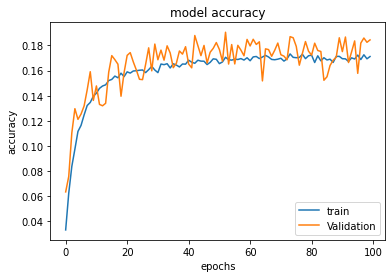

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
#vẽ đồ thị
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()